# import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score

# helper functions (if needed)

In [2]:
# python code...

# read training data into data frame

In [13]:
data = pd.read_csv("train.csv")
print(data)
print("non na values\n", data.count())

       age         workclass     education  education-num      marital-status  \
0       39         State-gov     Bachelors             13       Never-married   
1       50  Self-emp-not-inc     Bachelors             13  Married-civ-spouse   
2       38           Private       HS-grad              9            Divorced   
3       53           Private          11th              7  Married-civ-spouse   
4       37           Private       Masters             14  Married-civ-spouse   
...    ...               ...           ...            ...                 ...   
26044   43           Private     Assoc-voc             11  Married-civ-spouse   
26045   32           Private       Masters             14       Never-married   
26046   53           Private       Masters             14  Married-civ-spouse   
26047   22           Private  Some-college             10       Never-married   
26048   40           Private       HS-grad              9  Married-civ-spouse   

              occupation   

# analyze and visualize data to find candidate features

compare with hours-per-week
age  corellation: 
[[1.         0.06461111]
 [0.06461111 1.        ]]


compare with age
education-num  corellation: 
[[1.         0.03795332]
 [0.03795332 1.        ]]


compare with education num
education-num  corellation: 
[[1. 1.]
 [1. 1.]]


compare with hours-per-week
education-num  corellation: 
[[1.        0.1486174]
 [0.1486174 1.       ]]


compare with age
hours-per-week  corellation: 
[[1.         0.06461111]
 [0.06461111 1.        ]]


compare with education num
hours-per-week  corellation: 
[[1.        0.1486174]
 [0.1486174 1.       ]]




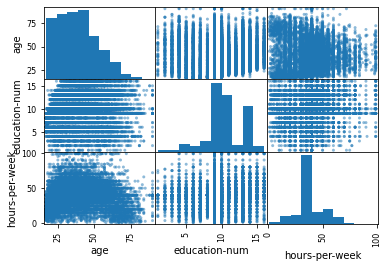

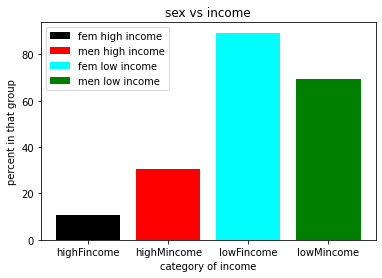

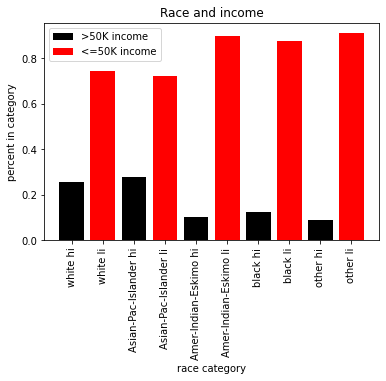

In [4]:
numColumns = data.select_dtypes(include='int')

for column, data2 in numColumns.items():
    if (column != 'age'):
            corellation = np.corrcoef(data2, data['age'])
            print("compare with age")
            print(column, " corellation: ")
            print(corellation)
            print("\n")
    if (column != 'age'):
            corellation = np.corrcoef(data2, data['education-num'])
            print("compare with education num")
            print(column, " corellation: ")
            print(corellation)
            print("\n")
    if (column != 'hours-per-week'):
            corellation = np.corrcoef(data2, data['hours-per-week'])
            print("compare with hours-per-week")
            print(column, " corellation: ")
            print(corellation)
            print("\n")
pd.plotting.scatter_matrix(numColumns)

hfincome =  np.where((data['sex']=='Female') & (data['income'] == '>50K'))

total = 0
values, counts =np.unique(hfincome, return_counts=True)
for count in counts:
    total += int(count)

lfincome =  np.where((data['sex']=='Female') & (data['income'] == '<=50K'))

total2 = 0
values, counts =np.unique(lfincome, return_counts=True)
for count in counts:
    total2 += int(count)
    

hmincome =  np.where((data['sex']=='Male') & (data['income'] == '>50K'))

total3 = 0
values, counts =np.unique(hmincome, return_counts=True)
for count in counts:
    total3 += int(count)

lmincome =  np.where((data['sex']=='Male') & (data['income'] == '<=50K'))

total4 = 0
values, counts =np.unique(lmincome, return_counts=True)
for count in counts:
    total4 += int(count)

men = data.loc[data['sex'] == 'Male']
women = data.loc[data['sex']=='Female']

a = np.shape(women)[0]
b = np.shape(men)[0]

perHf = (total / a)*100
perlf = (total2 / a)*100
perHm = (total3 / b)*100
perlm = (total4 / b) *100

plt.figure()
plt.title("sex vs income")
plt.xlabel("category of income")
plt.ylabel("percent in that group")
plt.bar('highFincome',perHf , color ='black', label = "fem high income")
plt.bar('highMincome',perHm , color ='red', label = "men high income")
plt.bar('lowFincome',perlf , color ='cyan', label = "fem low income")
plt.bar('lowMincome',perlm , color ='green', label = "men low income")
plt.legend()
plt.show()

whiteH = np.where((data['income']== '>50K') & (data['race']=='White'))

WHtotal = 0
values, counts =np.unique(whiteH, return_counts=True)
for count in counts:
    WHtotal += int(count)

whiteL = np.where((data['income']== '<=50K') & (data['race']=='White'))

WLtotal = 0
values, counts =np.unique(whiteL, return_counts=True)
for count in counts:
    WLtotal += int(count)
    
apiH = np.where((data['income']== '>50K') & (data['race']=='Asian-Pac-Islander'))

APItotal = 0
values, counts =np.unique(apiH, return_counts=True)
for count in counts:
    APItotal += int(count)

apiL = np.where((data['income']== '<=50K') & (data['race']=='Asian-Pac-Islander'))

APILtotal = 0
values, counts =np.unique(apiL, return_counts=True)
for count in counts:
    APILtotal += int(count)
    
aieH = np.where((data['income']== '>50K') & (data['race']=='Amer-Indian-Eskimo'))

aietotal = 0
values, counts =np.unique(aieH, return_counts=True)
for count in counts:
    aietotal += int(count)

aieL = np.where((data['income']== '<=50K') & (data['race']=='Amer-Indian-Eskimo'))

aieLtotal = 0
values, counts =np.unique(aieL, return_counts=True)
for count in counts:
    aieLtotal += int(count)


bH = np.where((data['income']== '>50K') & (data['race']=='Black'))

btotal = 0
values, counts =np.unique(bH, return_counts=True)
for count in counts:
    btotal += int(count)

bL = np.where((data['income']== '<=50K') & (data['race']=='Black'))

bLtotal = 0
values, counts =np.unique(bL, return_counts=True)
for count in counts:
    bLtotal += int(count)
    
oH = np.where((data['income']== '>50K') & (data['race']=='Other'))

ototal = 0
values, counts =np.unique(oH, return_counts=True)
for count in counts:
    ototal += int(count)

oL = np.where((data['income']== '<=50K') & (data['race']=='Other'))

oLtotal = 0
values, counts =np.unique(oL, return_counts=True)
for count in counts:
    oLtotal += int(count)

whiteHI = WHtotal/(WHtotal+WLtotal)
whiteLI = WLtotal/(WHtotal+WLtotal)

apiHI = APItotal/(APItotal+APILtotal)
apiLI = APILtotal/(APItotal+APILtotal)

aieHI = aietotal/(aietotal+aieLtotal)
aieLI = aieLtotal/(aietotal+aieLtotal)

bHI = btotal/(btotal+bLtotal)
bLI = bLtotal/(btotal+bLtotal)

oHI = ototal/(ototal+oLtotal)
oLI = oLtotal/(ototal+oLtotal)

plt.figure()
plt.bar("white hi",whiteHI, color ='black', label = ">50K income")
plt.bar("white li",whiteLI, color ='red', label = "<=50K income")
plt.bar('Asian-Pac-Islander hi',apiHI, color ='black')
plt.bar("Asian-Pac-Islander li",apiLI, color ='red')
plt.bar('Amer-Indian-Eskimo hi',aieHI, color ='black')
plt.bar('Amer-Indian-Eskimo li',aieLI, color ='red')
plt.bar("black hi",bHI, color ='black')
plt.bar("black li",bLI, color ='red')
plt.bar("other hi",oHI, color ='black')
plt.bar("other li",oLI, color ='red')
plt.title("Race and income")
plt.ylabel("percent in category")
plt.xlabel("race category")
plt.xticks(rotation=90)
plt.legend()
plt.show()

# split training data into features (X) and targets (y)

In [5]:
y = data['income']
X = data.drop(['income'], axis = 1)

# convert categorical data from strings to integers 

In [6]:
categories = pd.Categorical(X['education']) 
X['education'] = categories.codes 
categories = pd.Categorical(X['workclass']) 
X['workclass'] = categories.codes 
categories = pd.Categorical(X['marital-status']) 
X['marital-status'] = categories.codes 
categories = pd.Categorical(X['occupation']) 
X['occupation'] = categories.codes
categories = pd.Categorical(X['relationship']) 
X['relationship'] = categories.codes
categories = pd.Categorical(X['race']) 
X['race'] = categories.codes
categories = pd.Categorical(X['sex']) 
X['sex'] = categories.codes
categories = pd.Categorical(X['native-country']) 
X['native-country'] = categories.codes

# experiment w/ classifying training data using various feature sets

In [12]:
NBG = GaussianNB()
result = NBG.fit(X,y)

pred = cross_val_predict(result, X, y, cv=5)
a = accuracy_score(y, pred)
p = precision_score(y, pred, average='macro')
r = recall_score(y, pred, average='macro')

print("all columns gaussianNB")
print("accuracy: "+ str(a))
print("percision: "+ str(p))
print("recall: "+ str(r))
print("\n")

NBG = BernoulliNB()
result = NBG.fit(X,y)

pred = cross_val_predict(result, X, y, cv=5)
a = accuracy_score(y, pred)
p = precision_score(y, pred, average='macro')
r = recall_score(y, pred, average='macro')

print("all columns BernoulliNB")
print("accuracy: "+ str(a))
print("percision: "+ str(p))
print("recall: "+ str(r))
print("\n")

NBG = ComplementNB()
result = NBG.fit(X,y)

pred = cross_val_predict(result, X, y, cv=5)
a = accuracy_score(y, pred)
p = precision_score(y, pred, average='macro')
r = recall_score(y, pred, average='macro')

print("all columns ComplementNB")
print("accuracy: "+ str(a))
print("percision: "+ str(p))
print("recall: "+ str(r))
print("\n")

NBG = GaussianNB()
X2 = X.drop(['relationship'], axis = 1)
result = NBG.fit(X2,y)

pred = cross_val_predict(result, X2, y, cv=5)
a2 = accuracy_score(y, pred)
p2 = precision_score(y, pred, average='macro')
r2 = recall_score(y, pred, average='macro')

print("drop relationship gaussianNB")
print("accuracy: "+ str(a2))
print("percision: "+ str(p2))
print("recall: "+ str(r2))
print("\n")

NBG = GaussianNB()
X3 = X2.drop(['native-country'], axis = 1)
result = NBG.fit(X3,y)

pred = cross_val_predict(result, X3, y, cv=5)
a2 = accuracy_score(y, pred)
p2 = precision_score(y, pred, average='macro')
r2 = recall_score(y, pred, average='macro')

print("drop native-country and relationship gaussianNB")
print("accuracy: "+ str(a2))
print("percision: "+ str(p2))
print("recall: "+ str(r2))
print("\n")

NBG = GaussianNB()
X4 = X3.drop(['sex'], axis = 1)
result = NBG.fit(X4,y)

pred = cross_val_predict(result, X4, y, cv=5)
a2 = accuracy_score(y, pred)
p2 = precision_score(y, pred, average='macro')
r2 = recall_score(y, pred, average='macro')

print("drop native-country, sex, relationship gaussianNB")
print("accuracy: "+ str(a2))
print("percision: "+ str(p2))
print("recall: "+ str(r2))
print("\n")

NBG = GaussianNB()
X4 = X3.drop(['race'], axis = 1)
result = NBG.fit(X4,y)

pred = cross_val_predict(result, X4, y, cv=5)
a2 = accuracy_score(y, pred)
p2 = precision_score(y, pred, average='macro')
r2 = recall_score(y, pred, average='macro')

print("drop native-country, race, relationship gaussianNB")
print("accuracy: "+ str(a2))
print("percision: "+ str(p2))
print("recall: "+ str(r2))
print("\n")

all columns gaussianNB
accuracy: 0.7740796191792392
percision: 0.7086455868188226
recall: 0.75119583508558


all columns BernoulliNB
accuracy: 0.7346539214557181
percision: 0.6819279612221287
recall: 0.7345781464447445


all columns ComplementNB
accuracy: 0.6622519098621829
percision: 0.6560409149426388
recall: 0.7138578199183927


drop relationship gaussianNB
accuracy: 0.7909324734154862
percision: 0.7216394208822778
recall: 0.7532404807918547


drop native-country and relationship gaussianNB
accuracy: 0.7912011977427157
percision: 0.7219401496557245
recall: 0.7535268075024866


drop native-country, sex, relationship gaussianNB
accuracy: 0.8117394141809666
percision: 0.7422211507440297
recall: 0.7494484535689948


drop native-country, race, relationship gaussianNB
accuracy: 0.7986103113363276
percision: 0.7303337841589375
recall: 0.7615777823633094




# analyze and visualize experimental results

# Question: What features work "best"?  Why?

answer goes here

# create "best" classification model based on training data

In [8]:
# python code...

# read in test data 

In [9]:
# python code...

# use model to make predictions of test data

In [10]:
# python code...

# write test data with predicted labels

In [11]:
# python code...